In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml("mnist_784")

In [3]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [4]:
mnist_data = mnist.data

In [5]:
mnist_data

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
mnist_data.shape

(70000, 784)

In [7]:
mnist.target.shape

(70000,)

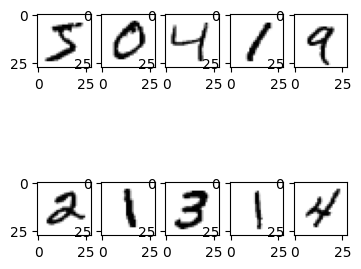

In [8]:
#visulaizing data using matplotlib
plt.figure(figsize=(4, 4))
image= mnist.data.to_numpy()
plt.subplot(2, 5, 1)
plt.imshow(image[0].reshape((28, 28)),cmap=plt.cm.gray_r)
plt.subplot(2, 5, 2)
plt.imshow(image[1].reshape((28, 28)), cmap= plt.cm.gray_r)
plt.subplot(2, 5, 3)
plt.imshow(image[2].reshape((28, 28)),cmap=plt.cm.gray_r)
plt.subplot(2, 5, 4)
plt.imshow(image[3].reshape((28, 28)), cmap= plt.cm.gray_r)
plt.subplot(2, 5, 5)
plt.imshow(image[4].reshape((28, 28)),cmap=plt.cm.gray_r)
plt.subplot(2, 5, 6)
plt.imshow(image[5].reshape((28, 28)), cmap= plt.cm.gray_r)
plt.subplot(2, 5, 7)
plt.imshow(image[6].reshape((28, 28)),cmap=plt.cm.gray_r)
plt.subplot(2, 5, 8)
plt.imshow(image[7].reshape((28, 28)), cmap= plt.cm.gray_r)
plt.subplot(2, 5, 9)
plt.imshow(image[8].reshape((28, 28)),cmap=plt.cm.gray_r)
plt.subplot(2, 5, 10)
plt.imshow(image[9].reshape((28, 28)), cmap= plt.cm.gray_r)

In [9]:
#train test split
print(mnist_data.shape)
index_number= np.random.permutation(70000)
x1,y1=mnist.data.loc[index_number],mnist.target.loc[index_number]
x1.reset_index(drop=True,inplace=True)
y1.reset_index(drop=True,inplace=True)
x_train , x_test = x1[:55000], x1[55000:]
y_train , y_test = y1[:55000], y1[55000:]

(70000, 784)


In [10]:
x_train.shape

(55000, 784)

In [11]:
x_test.shape

(15000, 784)

In [12]:
y_test.shape

(15000,)

In [13]:
y_train.shape

(55000,)

In [14]:
#svm algorithm to classify digits
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report

In [15]:
svc = svm.SVC(gamma="scale",class_weight="balanced",C=100)
svc.fit(x_train,y_train)

SVC(C=100, class_weight='balanced')

In [16]:
result=svc.predict(x_test)
print('Accuracy :',accuracy_score(y_test,result))
print(classification_report(y_test,result))

Accuracy : 0.9839333333333333
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1525
           1       0.99      0.99      0.99      1658
           2       0.98      0.98      0.98      1499
           3       0.99      0.98      0.99      1608
           4       0.98      0.99      0.98      1436
           5       0.98      0.98      0.98      1370
           6       0.98      0.99      0.99      1452
           7       0.99      0.99      0.99      1565
           8       0.99      0.98      0.98      1449
           9       0.97      0.97      0.97      1438

    accuracy                           0.98     15000
   macro avg       0.98      0.98      0.98     15000
weighted avg       0.98      0.98      0.98     15000



In [17]:
result.shape

(15000,)

In [18]:
x_test.shape

(15000, 784)

In [19]:
import random
def print_actual_predicted():
  x_test_data = np.array(x_test)
  random_list= [random.randint(0, x_test_data.shape[0]) for _ in range(10)]
  k = 1
  for i in random_list:
    plt.subplot(2, 5, k)
    x_test_data = np.array(x_test)
    plt.imshow(x_test_data[i].reshape((28, 28)),cmap=plt.cm.gray_r)
    print("Predicted: ", result[i])
    k += 1

Predicted:  0
Predicted:  7
Predicted:  8
Predicted:  1
Predicted:  2
Predicted:  5
Predicted:  0
Predicted:  0
Predicted:  0
Predicted:  7


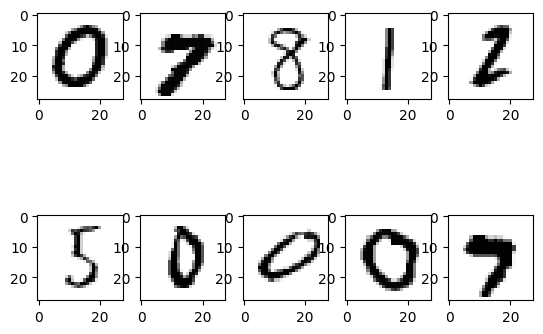

In [20]:
print_actual_predicted()